In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="Disease Progression")

# Explore the dataset
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
y.head()

,Disease Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [6]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [7]:
# Check for missing values
print(X.isnull().sum())

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


Simple Linear Regression (BMI Feature)
MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.23


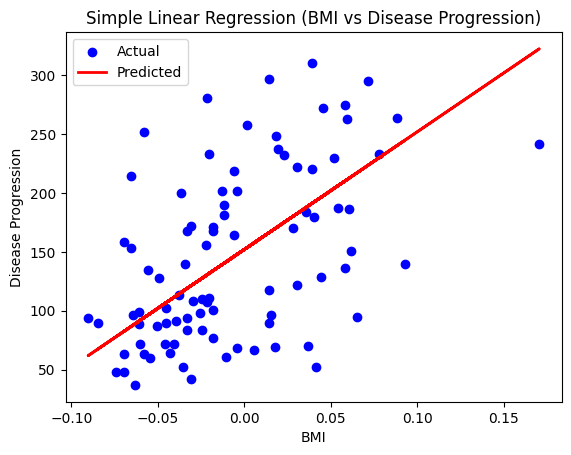

In [8]:
# Use 'bmi' as the single feature
X_bmi = X[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Simple Linear Regression (BMI Feature)")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualization
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.title("Simple Linear Regression (BMI vs Disease Progression)")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()


Multiple Linear Regression
MAE: 42.79, MSE: 2900.19, RMSE: 53.85, R²: 0.45


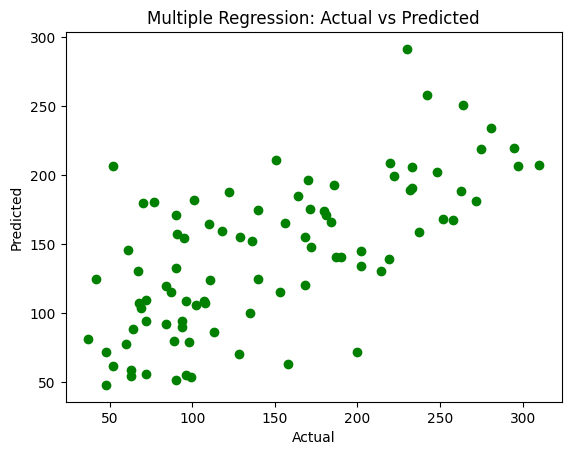

In [9]:
# Use all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)

# Evaluation
mae_m = mean_absolute_error(y_test, y_pred_multi)
mse_m = mean_squared_error(y_test, y_pred_multi)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test, y_pred_multi)

print("Multiple Linear Regression")
print(f"MAE: {mae_m:.2f}, MSE: {mse_m:.2f}, RMSE: {rmse_m:.2f}, R²: {r2_m:.2f}")

# Visualization
plt.scatter(y_test, y_pred_multi, color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Regression: Actual vs Predicted")
plt.show()


Polynomial Regression (degree=2)
MAE: 52.38, MSE: 4085.03, RMSE: 63.91, R²: 0.23


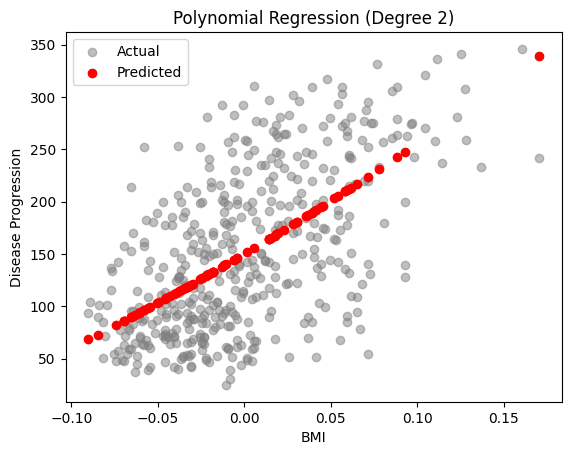

In [10]:
# Use 'bmi' again for visualization
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_bmi)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)
y_pred_poly = lr_poly.predict(X_test)

# Evaluation
mae_p = mean_absolute_error(y_test, y_pred_poly)
mse_p = mean_squared_error(y_test, y_pred_poly)
rmse_p = np.sqrt(mse_p)
r2_p = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (degree=2)")
print(f"MAE: {mae_p:.2f}, MSE: {mse_p:.2f}, RMSE: {rmse_p:.2f}, R²: {r2_p:.2f}")

# Visualization
plt.scatter(X_bmi, y, color='gray', alpha=0.5, label='Actual')
plt.scatter(X_test[:, 1], y_pred_poly, color='red', label='Predicted')
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


Ridge Regression
MAE: 42.81
MSE: 2892.03
RMSE: 53.78
R²: 0.45

Lasso Regression
MAE: 42.80
MSE: 2884.55
RMSE: 53.71
R²: 0.46



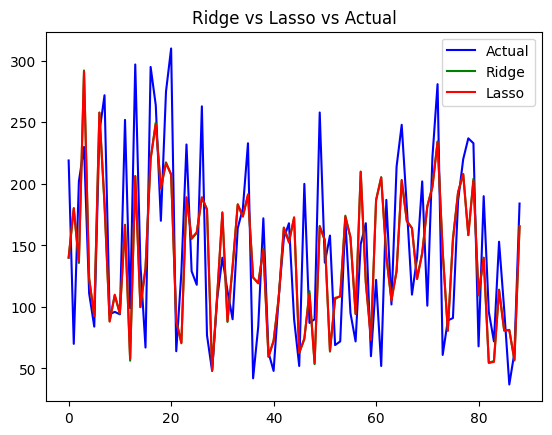

In [11]:
# Standardize the features for Ridge and Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation
def print_metrics(name, y_test, y_pred):
    print(f"{name}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}\n")

print_metrics("Ridge Regression", y_test, y_pred_ridge)
print_metrics("Lasso Regression", y_test, y_pred_lasso)

# Visual comparison
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_ridge, label='Ridge', color='green')
plt.plot(y_pred_lasso, label='Lasso', color='red')
plt.title("Ridge vs Lasso vs Actual")
plt.legend()
plt.show()
